# Тестовое задание Sputnik8. Анализ трафика 

## Необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

from prophet import Prophet

## Загрузка данных

In [2]:
visits_df = pd.read_csv("visits.csv", index_col=0)
views_df = pd.read_csv("views.csv", index_col=0)
orders_df = pd.read_csv("orders.csv", index_col=0)

## EDA

### visits.csv

In [3]:
"""
id – id визита
started_at – дата визита на сайт, то есть когда человек первый раз зашел к нам
utm_medium – канал трафика
device_type - указание девайса, с которого пользователь зашел на сайт
utm_source - поисковая система пользователя
browser - браузер, который использовал пользователь

"""
visits_df.head()

,started_at,id,utm_medium,device_type,utm_source,browser
0,2023-03-01 02:50:00.564479,277249829,organic,Mobile,yandex,Chrome Mobile
1,2023-03-01 06:40:17.746113,277323126,organic,Tablet,yandex,Yandex Browser
2,2023-03-01 07:36:36.907793,277337231,organic,Mobile,yandex,Chrome Mobile
3,2023-03-01 07:48:37.006550,277340573,organic,Desktop,google,Chrome
4,2023-03-01 07:52:18.295917,277341578,affiliate,Desktop,affiliate_3421,Firefox


In [4]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850912 entries, 0 to 850911
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   started_at   850912 non-null  object
 1   id           850912 non-null  int64 
 2   utm_medium   850912 non-null  object
 3   device_type  850909 non-null  object
 4   utm_source   850912 non-null  object
 5   browser      850905 non-null  object
dtypes: int64(1), object(5)
memory usage: 45.4+ MB


In [5]:
for col in visits_df.columns:
    print(visits_df[col].value_counts())
    print()

started_at
2024-05-15 15:29:27.597338    2
2024-05-15 18:49:50.701155    2
2024-05-15 18:54:28.875674    2
2024-05-15 19:26:47.404486    2
2024-05-15 19:42:28.497876    2
                             ..
2024-06-10 18:33:22.469293    1
2024-06-10 18:42:12.091076    1
2024-06-10 18:49:30.683870    1
2024-06-10 18:56:32.112816    1
2023-05-31 23:22:57.288269    1
Name: count, Length: 849937, dtype: int64

id
611537383    2
611702437    2
611705888    2
611731997    2
611744329    2
            ..
637636833    1
637645732    1
637653040    1
637660025    1
333758799    1
Name: count, Length: 849937, dtype: int64

utm_medium
organic      739742
cpc           67368
affiliate     43802
Name: count, dtype: int64

device_type
Mobile     664733
Desktop    107301
Tablet      63578
Phablet     15231
TV             58
Console         8
Name: count, dtype: int64

utm_source
google            419379
yandex            385658
affiliate_1        18607
affiliate_151      16595
affiliate_555       2927
  

In [6]:
visits_df.isna().sum()

started_at     0
id             0
utm_medium     0
device_type    3
utm_source     0
browser        7
dtype: int64

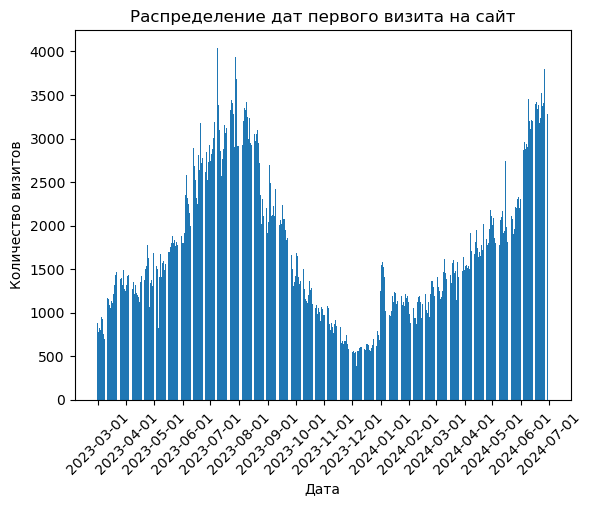

In [7]:
data = visits_df.copy()
data["started_at_date"] = pd.to_datetime(data["started_at"])
data["started_at_date"] = data["started_at_date"].dt.date

data = data.groupby("started_at_date")['id'].count()
fig, ax = plt.subplots()
ax.bar(data.index, data.values)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.title("Распределение дат первого визита на сайт")
plt.xlabel("Дата")
plt.ylabel("Количество визитов")
plt.show()

### views.csv

In [8]:
"""
id – id просмотра экскурсии, которую посмотрел пользователь
visit_id – id визита
time – время просмотра страницы экскурсии

"""
views_df.head()

,time,id,visit_id
0,2024-06-30 20:20:48.141495,119089860,661384025
1,2024-06-30 20:21:02.648150,119089916,661384025
2,2024-06-30 20:23:51.727024,119090574,661384025
3,2024-06-30 20:49:01.842606,119096406,661384025
4,2024-06-30 20:52:11.079409,119097078,661609161


In [9]:
views_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560222 entries, 0 to 560221
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   time      560222 non-null  object
 1   id        560222 non-null  int64 
 2   visit_id  560222 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 17.1+ MB


In [10]:
for col in views_df.columns:
    print(views_df[col].value_counts())
    print()

time
2023-05-26 19:13:20.334901    4
2023-06-23 15:16:47.081059    3
2023-10-11 15:02:41.798014    3
2023-02-24 07:21:45.192210    3
2023-02-09 13:56:18.581943    3
                             ..
2024-05-12 14:25:14.604028    1
2024-05-12 14:25:13.476775    1
2024-05-12 14:25:12.678750    1
2024-05-12 14:25:12.533622    1
2023-06-30 23:55:57.773000    1
Name: count, Length: 560114, dtype: int64

id
119089860    1
75766058     1
72768332     1
80432236     1
80432537     1
            ..
107982287    1
108120329    1
108265294    1
108141818    1
66334640     1
Name: count, Length: 560222, dtype: int64

visit_id
355668607    117
320558814     80
647137593     56
411472706     55
649392885     50
            ... 
255167153      1
255354959      1
256081642      1
255420730      1
359038376      1
Name: count, Length: 243884, dtype: int64



### orders.csv

In [11]:
"""
id – id заказа, который создал человек во время визита
visit_id – id визита
created_at – дата создания заказа 
state – статус заказа. Статус может быть 3-х типов: 
pending - заказ еще не был проведен на момент выгрузки
held - заказ успешно проведен
canceled - заказ был отменен 

"""
orders_df.head()

,created_at,id,visit_id,state
0,2024-01-14 11:25:22.889597,2019060,515725102.0,held
1,2024-01-05 12:17:37.790378,2009076,509837645.0,held
2,2024-03-06 21:13:36.779976,2094016,552236470.0,held
3,2024-02-10 22:39:52.937576,2052647,534974347.0,held
4,2024-02-18 18:58:46.747766,2064185,540372323.0,canceled


In [144]:
for col in orders_df.columns:
    print(orders_df[col].value_counts())
    print()

created_at
2024-01-14 11:25:22.889597    1
2023-09-25 04:35:14.802689    1
2023-09-21 09:31:08.848713    1
2023-07-18 00:39:33.110500    1
2023-08-14 21:25:54.031924    1
                             ..
2023-10-06 16:09:30.264586    1
2023-11-12 19:35:45.945908    1
2023-10-09 16:10:27.527652    1
2023-11-26 10:46:11.751927    1
2023-03-26 06:22:40.757163    1
Name: count, Length: 22228, dtype: int64

id
2019060    1
1827980    1
1815151    1
1512121    1
1666891    1
          ..
1858798    1
1937404    1
1865574    1
1956079    1
1113294    1
Name: count, Length: 22228, dtype: int64

visit_id
329899571.0    8
383087309.0    7
314646462.0    6
442323404.0    6
398467271.0    6
              ..
344436855.0    1
315239892.0    1
319136771.0    1
334797339.0    1
282495808.0    1
Name: count, Length: 18406, dtype: int64

state
held        12171
canceled     9948
pending       109
Name: count, dtype: int64



## 1. Выявление аномалий в данных visits.csv

In [12]:
visits_df.rename({"id": "visit_id"}, axis=1, inplace=True)

In [13]:
anomaly_visits_df = visits_df[(visits_df["browser"] == "Chrome Mobile") &\
    (visits_df["utm_medium"] == "organic") &\
    (visits_df["utm_source"] == "yandex") &\
    (visits_df["device_type"] == "Mobile")].copy()

In [14]:
print(f"Доля аномального трафика (organic|Chrome Mobile|yandex|Mobile): {round(anomaly_visits_df.shape[0]/visits_df.shape[0], 4) * 100}%")

Доля аномального трафика (organic|Chrome Mobile|yandex|Mobile): 5.53%


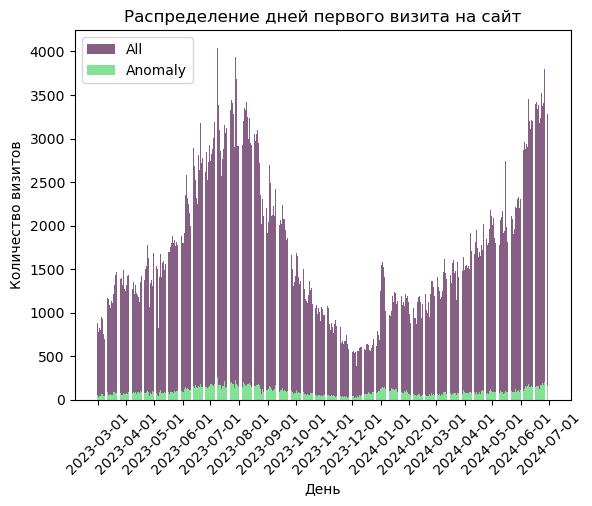

In [15]:
data = visits_df.copy()
data["started_at_date"] = pd.to_datetime(data["started_at"])
data["started_at_date"] = data["started_at_date"].dt.date

data_anom_df = anomaly_visits_df.copy()
data_anom_df["started_at_date"] = pd.to_datetime(data_anom_df["started_at"])
data_anom_df["started_at_date"] = data_anom_df["started_at_date"].dt.date

data = data.groupby("started_at_date")['visit_id'].count()
data_anom_df = data_anom_df.groupby("started_at_date")['visit_id'].count()

fig, ax = plt.subplots()

ax.bar(data.index, data.values, color="#856084", label="All")
ax.bar(data_anom_df.index, data_anom_df.values, color="#84E296", label="Anomaly")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.title("Распределение дней первого визита на сайт")
plt.xlabel("День")
plt.ylabel("Количество визитов")
plt.legend()
plt.show()

Аномальный трафик распределен равномерно по периоду, т. е. нельзя сказать, что есть определенные аномальные дни.

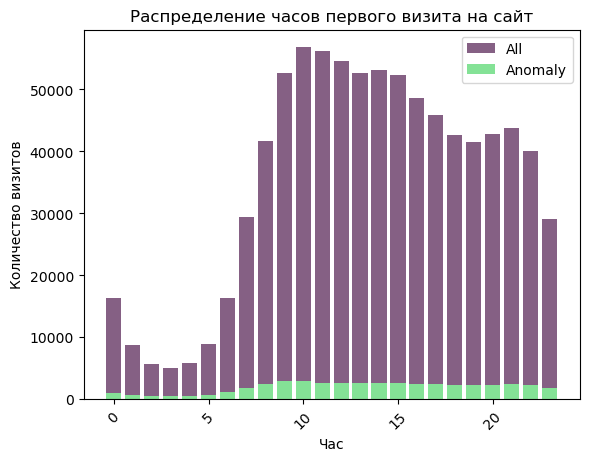

In [16]:
data = visits_df.copy()
data["started_at_hour"] = pd.to_datetime(data["started_at"])
data["started_at_hour"] = data["started_at_hour"].dt.hour

data_anom_df = anomaly_visits_df.copy()
data_anom_df["started_at_hour"] = pd.to_datetime(data_anom_df["started_at"])
data_anom_df["started_at_hour"] = data_anom_df["started_at_hour"].dt.hour

data = data.groupby("started_at_hour")['visit_id'].count()
data_anom_df = data_anom_df.groupby("started_at_hour")['visit_id'].count()

fig, ax = plt.subplots()

ax.bar(data.index, data.values, color="#856084", label="All")
ax.bar(data_anom_df.index, data_anom_df.values, color="#84E296", label="Anomaly")
plt.xticks(rotation=45)
plt.title("Распределение часов первого визита на сайт")
plt.xlabel("Час")
plt.ylabel("Количество визитов")
plt.legend()
plt.show()

Аномальный трафик распределен равномерно в течение дня, т. е. нельзя сказать, что есть аномальное время суток

Проверка на пропуски в данных

In [17]:
visits_df[visits_df['browser'].isna()]

,started_at,visit_id,utm_medium,device_type,utm_source,browser
563343,2023-06-17 16:31:53.516952,346892481,affiliate,Desktop,affiliate_151,NaN
565630,2023-06-19 12:17:27.419171,348421664,affiliate,Desktop,affiliate_151,NaN
713876,2023-06-17 16:31:53.514472,346892478,affiliate,Desktop,affiliate_151,NaN
713877,2023-06-17 16:31:53.537302,346892480,affiliate,Desktop,affiliate_151,NaN
751245,2024-03-26 15:36:15.088374,566612131,affiliate,Desktop,affiliate_1,NaN
758562,2024-03-26 15:36:16.904541,566612153,affiliate,Desktop,affiliate_1,NaN
762554,2023-06-17 16:31:53.517351,346892479,affiliate,Desktop,affiliate_151,NaN


In [18]:
visits_df[visits_df['device_type'].isna()]

,started_at,visit_id,utm_medium,device_type,utm_source,browser
4341,2023-03-10 12:00:54.103520,282545046,organic,NaN,yandex,Android Browser
316103,2024-06-21 09:40:04.349555,650486576,cpc,NaN,yandex,Yandex Browser
561117,2023-06-14 20:45:32.956441,344539475,organic,NaN,yandex,Firefox Mobile


Есть трафик c неизвестными браузерами и типами устройств. Скорее всего это некоторая техническая аномалия. В зависимости от решаемой задачи, можно либо заменить пропущенные значения модой или удалить указанные визиты

In [19]:
# Вычистка аномальных посещений
clean_visits_df = visits_df[~visits_df.index.isin(anomaly_visits_df.index)].copy()

Проанализируем просмотры страниц и заказы по аномальным и "неаномальным" посещениям сайта

In [20]:
anomaly_visits_views_df = anomaly_visits_df.merge(views_df, on="visit_id", how="left").rename({"id": "view_id"}, axis=1)

In [21]:
clean_visits_views_df = clean_visits_df.merge(views_df, on="visit_id", how="left").rename({"id": "view_id"}, axis=1)

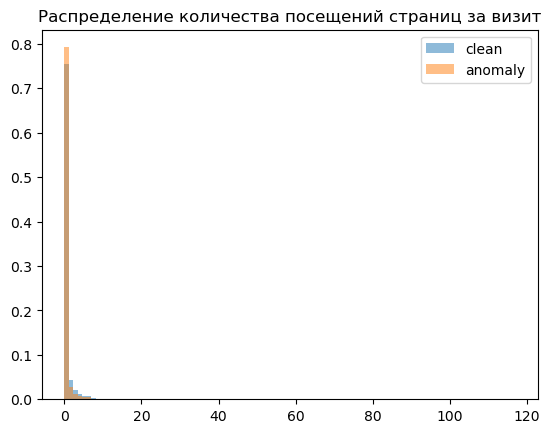

In [22]:
_, bins, _ = plt.hist(clean_visits_views_df.groupby(['visit_id'])['view_id'].count(), alpha=0.5, density=True, bins=100, label="clean")
plt.hist(anomaly_visits_views_df.groupby(['visit_id'])['view_id'].count(), alpha=0.5, density=True, bins=bins, label="anomaly")
plt.legend()
plt.title("Распределение количества посещений страниц за визит")
plt.show()

In [23]:
clean_visits_views_df.groupby(['visit_id'])['view_id'].count().describe()

count    802900.000000
mean          0.578317
std           1.590004
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         117.000000
Name: view_id, dtype: float64

In [24]:
anomaly_visits_views_df.groupby(['visit_id'])['view_id'].count().describe()

count    47037.000000
mean         0.383677
std          1.262195
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         45.000000
Name: view_id, dtype: float64

Нельзя утверждать, что есть существенная разница между распределениями количества просмотров страниц в аномальных и аномальных данных

In [25]:
anomaly_visits_orders_df = anomaly_visits_df.merge(orders_df, on="visit_id", how="left").rename({"id": "order_id"}, axis=1)

In [26]:
clean_visits_orders_df = clean_visits_df.merge(orders_df, on="visit_id", how="left").rename({"id": "order_id"}, axis=1)

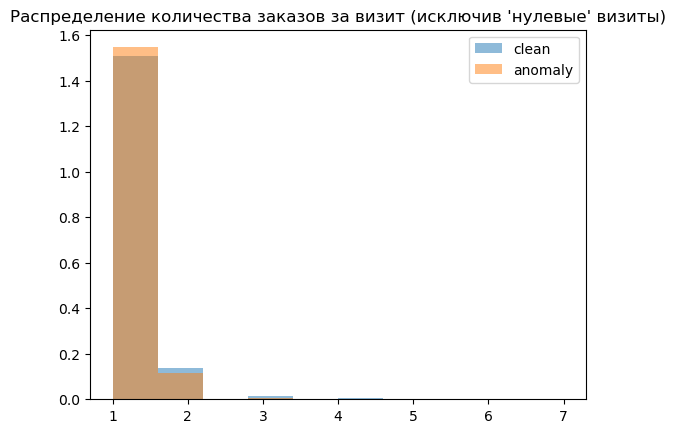

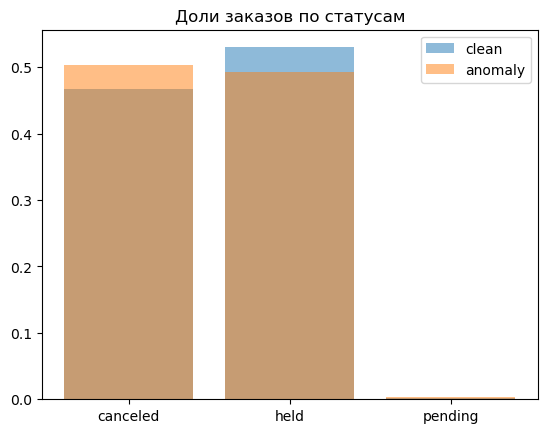

In [27]:
clean_stats_by_visit = clean_visits_orders_df[~clean_visits_orders_df['order_id'].isna()].groupby(['visit_id'])['order_id'].count()
clean_stats_by_order_state = clean_visits_orders_df[~clean_visits_orders_df['order_id'].isna()].groupby(['state'])['order_id'].count()
clean_stats_by_order_state = clean_stats_by_order_state/clean_stats_by_order_state.sum()

anomaly_stats_by_visit = anomaly_visits_orders_df[~anomaly_visits_orders_df['order_id'].isna()].groupby(['visit_id'])['order_id'].count()
anomaly_stats_by_order_state = anomaly_visits_orders_df[~anomaly_visits_orders_df['order_id'].isna()].groupby(['state'])['order_id'].count()
anomaly_stats_by_order_state = anomaly_stats_by_order_state/anomaly_stats_by_order_state.sum()

_, bins, _ = plt.hist(clean_stats_by_visit, alpha=0.5, density=True, label="clean")
plt.hist(anomaly_stats_by_visit, alpha=0.5, density=True, bins=bins, label="anomaly")
plt.legend()
plt.title("Распределение количества заказов за визит (исключив 'нулевые' визиты)")
plt.show()

plt.bar(clean_stats_by_order_state.index, clean_stats_by_order_state.values, alpha=0.5, label="clean")
plt.bar(anomaly_stats_by_order_state.index, anomaly_stats_by_order_state.values, alpha=0.5, label="anomaly")
plt.legend()
plt.title("Доли заказов по статусам")
plt.show()

В аномальных данных доля отмененных заказов чуть больше, чем в чистых, но отличие незначительное

## 2. Оценка эффективности органического трафика

Я бы предложила оценить эффективность канала через конверсию посещения сайта в завершенный заказ и общее количество посещений сайта. Под конверсией я понимаю отношение количество визитов, во время которых был осуществлен заказ, к общему количеству визитов. Чем больше конверсия, тем больше клиентов проходит полный путь пользователя от открытия страницы сайта до совершения покупки, соответственно, компания получает деньги.

In [28]:
organic_df = clean_visits_orders_df[clean_visits_orders_df['utm_medium'] == 'organic'].copy()

In [29]:
conv = organic_df[~organic_df['order_id'].isna()]['visit_id'].nunique()/organic_df['visit_id'].nunique() * 100

In [30]:
# конверсия за весь период по органическому каналу, %
conv

1.1006212041937788

In [31]:
total_visits = organic_df['visit_id'].nunique()

In [32]:
# общее количество визитов за период по органическому каналу
total_visits

691882

In [33]:
organic_df['started_at'] = pd.to_datetime(organic_df['started_at'])
organic_df['month_year'] = organic_df.apply(lambda x: x['started_at'].strftime("%Y-%m"), axis=1)

In [34]:
conv_by_months = organic_df[~organic_df['order_id'].isna()].groupby("month_year")['visit_id'].nunique()/\
    organic_df.groupby("month_year")['visit_id'].nunique() * 100

total_by_months = organic_df.groupby("month_year")['visit_id'].nunique()

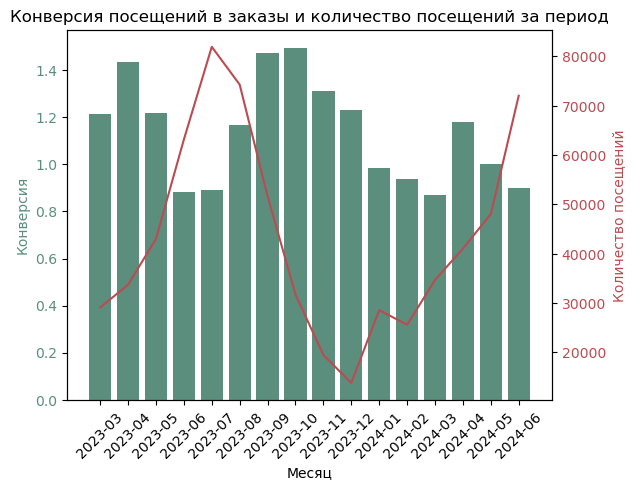

In [35]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Месяц')
c1 = "#5B8E7D"
ax1.set_ylabel('Конверсия', color=c1)
ax1.bar(conv_by_months.index, conv_by_months.values, color=c1)
ax1.tick_params(axis='y', labelcolor=c1)
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
c2 = "#BC4B51"
ax2.set_ylabel('Количество посещений', color=c2)
ax2.plot(total_by_months, color=c2)
ax2.tick_params(axis='y', labelcolor=c2)

fig.tight_layout()

plt.title("Конверсия посещений в заказы и количество посещений за период") 
plt.show()

С точки зрения конверсии лучшим стал октябрь 2023, а с точки зрения количества посещений - июль 2023.

Если взять среднее значение по количеству посещений и второе по конверсии, то лучшим с точки зрения оптимальности двух параметров будет сентябрь 2023 для органического канала.

Самые худшие - это январь-март 2024. Те месяцы отличаются и низкой конверсией, и малым количеством заказов.

## 3. Прогноз визитов

Для прогноза можно воспользоваться библиотекой для предсказания временных рядов prophet. Модель нужно обучить с учетом годичной сезонности

In [113]:
data = organic_df.groupby("month_year")['visit_id'].nunique()
data = data.reset_index(name="y").rename({"month_year": "ds"}, axis=1)
data['ds'] = pd.to_datetime(data['ds'])

In [114]:
m = Prophet(yearly_seasonality=True, 
    weekly_seasonality=False, 
    daily_seasonality=False)
m.fit(data)

00:03:51 - cmdstanpy - INFO - Chain [1] start processing
00:03:51 - cmdstanpy - INFO - Chain [1] done processing


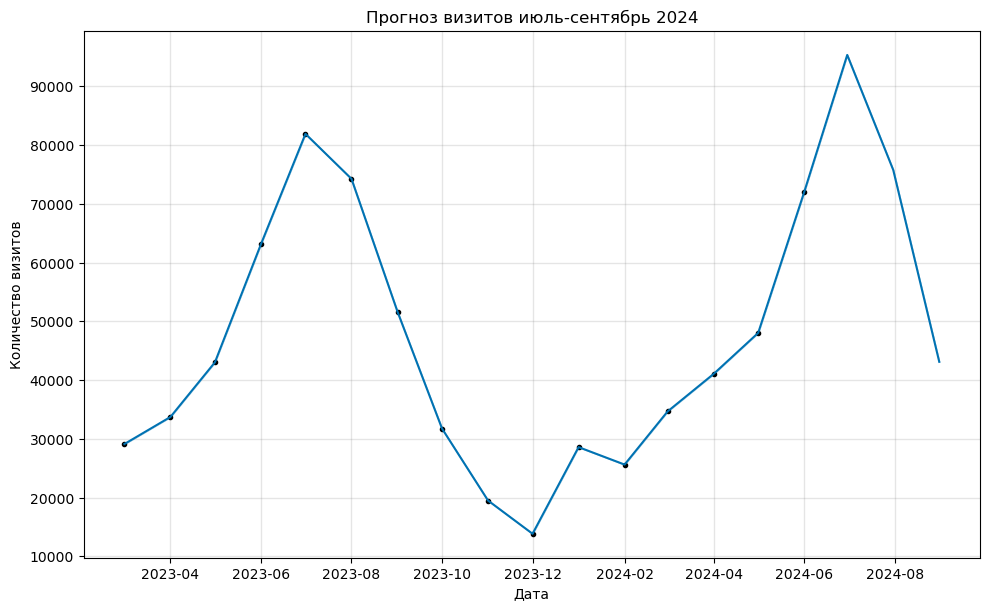

In [115]:
future = m.make_future_dataframe(periods=3, freq="ME")
forecast = m.predict(future)
fig = m.plot(forecast)
plt.title("Прогноз визитов июль-сентябрь 2024")
plt.xlabel("Дата")
plt.ylabel("Количество визитов")
plt.show()

In [116]:
preds = forecast[['ds', 'yhat']].tail(3)
preds['ds'] = preds['ds'] + pd.tseries.offsets.MonthBegin(1)
preds['yhat'] = preds['yhat'].round()

In [117]:
new_data = pd.concat([data, preds.rename({"yhat": "y"}, axis=1)])

Увеличиваем эффективность на 5% и повторяем прогноз

In [135]:
data = organic_df.groupby("month_year")['visit_id'].nunique()
data = data.reset_index(name="y").rename({"month_year": "ds"}, axis=1)
data['ds'] = pd.to_datetime(data['ds'])
data['y'] = data['y'] + data['y'] * 0.05

In [137]:
m = Prophet(yearly_seasonality=True, 
    weekly_seasonality=False, 
    daily_seasonality=False)
m.fit(data)

00:14:02 - cmdstanpy - INFO - Chain [1] start processing
00:14:06 - cmdstanpy - INFO - Chain [1] done processing


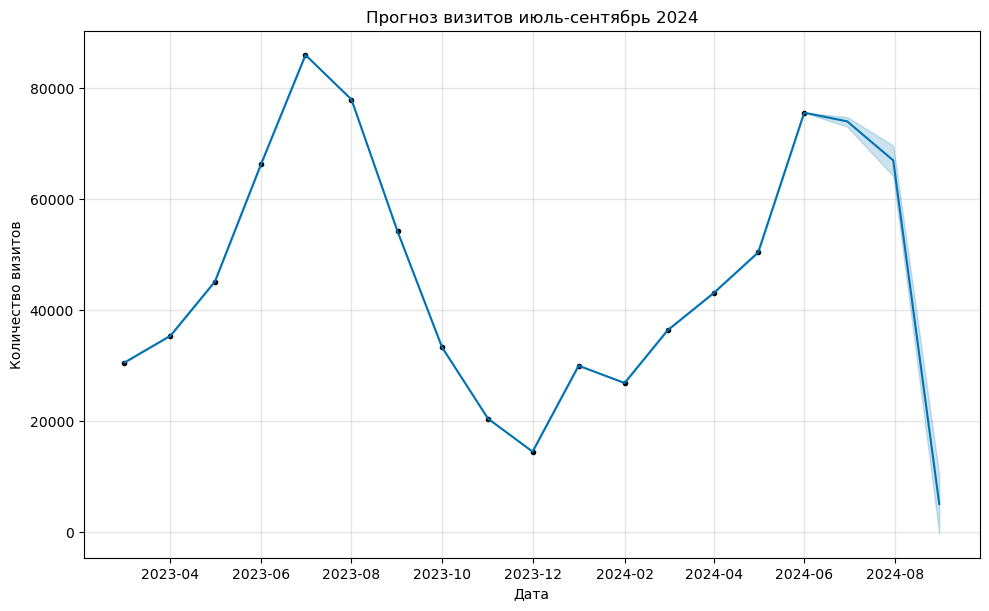

In [138]:
future = m.make_future_dataframe(periods=3, freq="ME")
forecast = m.predict(future)
fig = m.plot(forecast)
plt.title("Прогноз визитов июль-сентябрь 2024")
plt.xlabel("Дата")
plt.ylabel("Количество визитов")
plt.show()

In [139]:
preds_mult = forecast[['ds', 'yhat']].tail(3)
preds_mult['ds'] = preds_mult['ds'] + pd.tseries.offsets.MonthBegin(1)
preds_mult['yhat'] = preds_mult['yhat'].round()

Общий график

In [140]:
new_data_mult = pd.concat([data, preds_mult.rename({"yhat": "y"}, axis=1)])


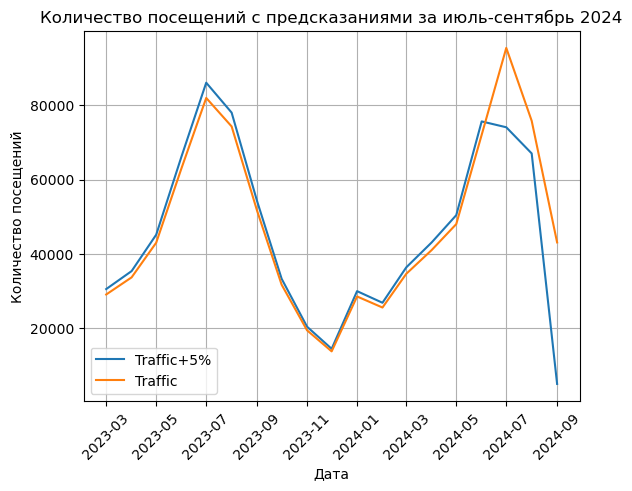

In [141]:
fig, ax = plt.subplots()
plt.plot(new_data_mult['ds'], new_data_mult['y'], label='Traffic+5%')
plt.plot(new_data['ds'], new_data['y'], label='Traffic')
plt.legend()
plt.xticks(rotation=45)
plt.title("Количество посещений с предсказаниями за июль-сентябрь 2024")
plt.ylabel("Количество посещений")
plt.xlabel("Дата")
plt.grid()
plt.show()

Prophet требует тюнинга и бОльшего количество данных для обучения, но в целом даже при текущих настройках по умолчанию смог воспроизвести пик посещений в июле и последующее падение кол-ва посещений в августе и сентябре

После увеличения эффективности Prophet выдает предсказание более низкого трафика, но опять-таки это скорее всего связано с недообучением.

## 4. Канал с наибольшим потенциалом

In [145]:
organic_df = clean_visits_orders_df[clean_visits_orders_df['utm_medium'] == 'organic'].copy()
aff_df = clean_visits_orders_df[clean_visits_orders_df['utm_medium'] == 'affiliate'].copy()
cpc_df = clean_visits_orders_df[clean_visits_orders_df['utm_medium'] == 'cpc'].copy()

In [161]:
def get_stats(data):
    data['started_at'] = pd.to_datetime(data['started_at'])
    data['month_year'] = data.apply(lambda x: x['started_at'].strftime("%Y-%m"), axis=1)
    conv_by_months = data[~data['order_id'].isna()].groupby("month_year")['visit_id'].nunique()/\
        data.groupby("month_year")['visit_id'].nunique() * 100

    total_by_months = data.groupby("month_year")['visit_id'].nunique()

    stats = conv_by_months.rename('conv_by_months').reset_index().merge(total_by_months.rename('total_by_months').reset_index(),
                                                                        on='month_year')
    return stats

def plot_stats(stats, name):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Месяц')
    c1 = "#5B8E7D"
    ax1.set_ylabel('Конверсия', color=c1)
    ax1.bar(stats.month_year, stats.conv_by_months, color=c1)
    ax1.tick_params(axis='y', labelcolor=c1)
    ax1.tick_params(axis='x', rotation=45)
    
    ax2 = ax1.twinx()
    c2 = "#BC4B51"
    ax2.set_ylabel('Количество посещений', color=c2)
    ax2.plot(stats.total_by_months, color=c2)
    ax2.tick_params(axis='y', labelcolor=c2)
    
    fig.tight_layout()
    
    plt.title(f"Конверсия посещений в заказы и количество посещений за период, {name}") 
    plt.show()

In [163]:
organic_stats = get_stats(organic_df)
aff_stats = get_stats(aff_df)
cpc_stats = get_stats(cpc_df)

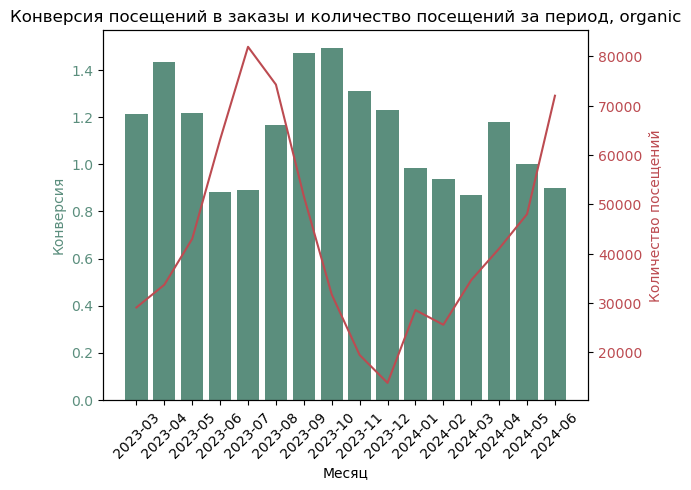

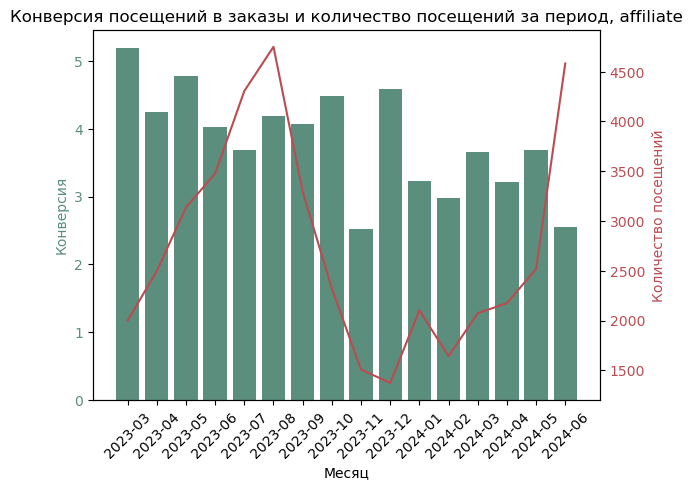

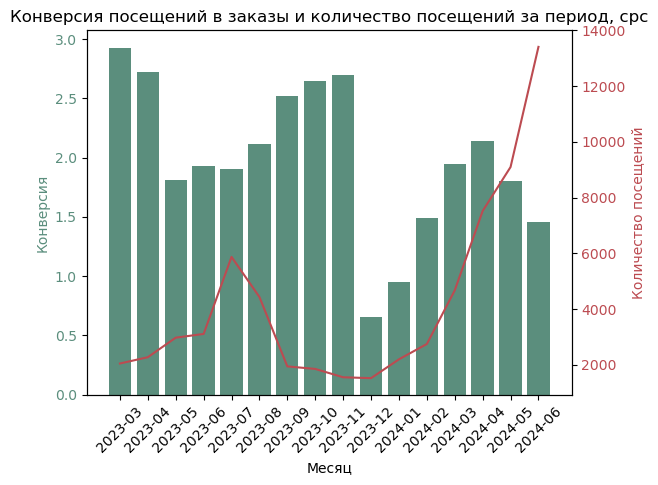

In [164]:
plot_stats(organic_stats, 'organic')
plot_stats(aff_stats, 'affiliate')
plot_stats(cpc_stats, 'cpc')

In [168]:
100 * cpc_stats.total_by_months.max() / cpc_stats.total_by_months.min()

880.6303348653972

С точки зрения потенциала  количества посещений самый интересный - cpc. С начала 2024 года количество посещений выросло с 2 тыс. до 14 тыс. (+780%). Можно подумать, как повысить конверсию этого трафика в заказы и сделать ее более стабильной.  

Канал affiliate имеет бОльшую стабильность по сравнению с другими, но трафик мал (в среднем 3 тыс. посещений в месяц). Если привлечь больше пользователей и сохранить конверсию, потенциал повысить прибыль за счет этого канала очень высок.

Канал organic 'консервативный', с большой "базой" количества посещений и небольшой конверсией. Можно подумать, как увеличить конверсию, сделать ее более стабильной, чтобы больше пользователей дошли до завершения заказа.

Таким образом, все каналы имеют высокий потенциал. Просто каждый со своей точки зрения требует "доработок".

## 5. Дополнительные выводы

Я думаю, что для более глубоких выводов нужно посмотреть путь конкретного пользователя, что приводит к его прерыванию, провести исследования. 